In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [10]:
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [4]:
data = datasets.fetch_openml(
    'mnist_784',
    version= 1,
    return_X_y=True
)

In [6]:
pixel_values, targets = data
targets = targets.astype(int)

In [7]:
pixel_values.shape


(70000, 784)

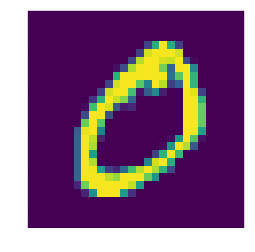

In [11]:
single_image = pixel_values[1][:].reshape(28, 28)
plt.imshow(single_image)

In [13]:
tsne = manifold.TSNE(n_components = 2, random_state= 0)
transformed_data = tsne.fit_transform(pixel_values[:3000][:])

In [14]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns= ["x", "y", "targets"]
)

In [15]:
tsne_df.head()

,x,y,targets
0,25.373796,-18.227240,5.0
1,66.545044,15.872371,0.0
2,-0.426923,-62.208992,4.0
3,-47.992596,14.603774,1.0
4,-16.006390,-40.070068,9.0


In [16]:
tsne_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
x          3000 non-null float64
y          3000 non-null float64
targets    3000 non-null float64
dtypes: float64(3)
memory usage: 70.4 KB


In [22]:
tsne_df.loc[:]["targets"] = tsne_df.targets.astype(int)

/home/shivam/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f15ac1cb4a8>>

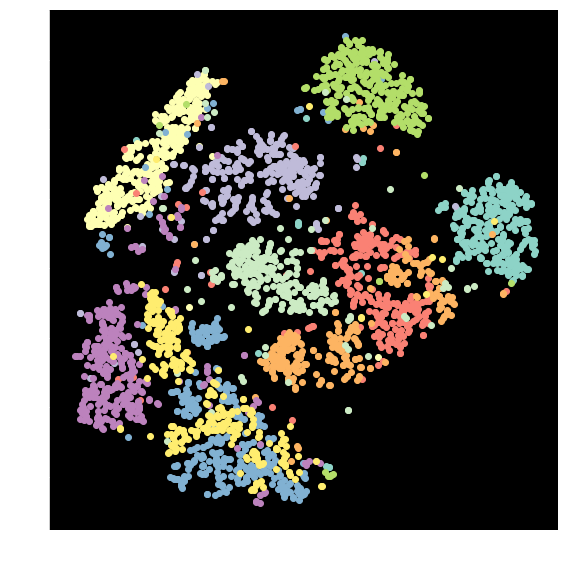

In [28]:
grid = sns.FacetGrid(tsne_df, hue = "targets", size = 8)
grid.map(plt.scatter, "x", "y").add_legend